# StyleCheck Experiment Data Analysis

## Setup

In [1]:
%matplotlib inline

In [58]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# Styles
plt.style.use('ggplot')
#print(plt.style.available)

# Make the tables look prettier
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
img_folder = "/Users/Dani/Documents/Courses/MLT/12-Master-Thesis/off-with-their-heads/img"

In [46]:
# Imports
style = pd.read_csv('style.csv', sep=";", decimal=",", index_col="id")

# Convenience names
suggested = "StyleCheck suggestion given"
corrected = "Corrected after StyleCheck suggestion"

# Create categorial data and order it
style.setup = style.setup.str.upper().astype("category", categories=["SCRATCH", "PE", "STYLE"], ordered=True)
style.text = style.text.str.upper().astype("category", categories=["AI", "CHARLOTTE", "GARFIELD"], ordered=True)
style.rule = style.rule.astype("category", categories=["1A", "1B", "1C", "1D", "1E", "1F", "2A", "2B", "2C", "3A", "3B", "3C", "3D"], ordered=True)
style.applied = style.applied.str.upper().astype("category", categories=["YES", "NO", "MIXED", "AVOIDED"], ordered=True)
style.pe_applied = style.pe_applied.str.upper().astype("category", categories=["YES", "NO", "MIXED"], ordered=True)
style[corrected] = style[corrected].str.upper().astype("category", categories=["YES", "NO"], ordered=True)

# Convenience names
suggested = "StyleCheck suggestion given"
corrected = "Corrected after StyleCheck suggestion"

In [5]:
def sns_style(h=6, w=12):
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.6)
    plt.figure(figsize=(w, h))
    
def pie(column):
    """Create a pie chart from the counts in a column."""
    style[column].value_counts().plot(kind="pie", figsize=(6,6), autopct='%.2f', fontsize=20)

In [47]:
style

,rule,setup,text,applied,in_stylecheck,StyleCheck suggestion given,Corrected after StyleCheck suggestion,pe_applied,suggestion_rejected_position,checked_style_guide,sentence
id,,,,,,,,,,,
423,1D,PE,AI,MIXED,yes,NaN,NaN,MIXED,NaN,no,"Siete años más tarde, una iniciativa visionari..."
425,1D,PE,AI,MIXED,yes,NaN,NaN,MIXED,NaN,no,"Siete años más tarde, una iniciativa visionari..."
432,1D,STYLE,AI,MIXED,yes,yes,YES,MIXED,NaN,brief,"Siete años más tarde, una iniciativa visionari..."
421,1B,SCRATCH,AI,AVOIDED,yes,NaN,NaN,NO,NaN,no,El ámbito de la inteligencia artificial no log...
421,1E,SCRATCH,AI,AVOIDED,yes,NaN,NaN,NO,NaN,no,En 1973 el gobierno británico y estadounidense...
423,1B,PE,AI,AVOIDED,yes,NaN,NaN,NO,NaN,no,"Este ciclo de altibajos, con auges y caídas de..."
424,1E,STYLE,AI,AVOIDED,yes,NaN,NaN,NO,NaN,no,"En 1973, los Gobiernos de Estados Unidos y Rei..."
425,1B,PE,AI,AVOIDED,yes,NaN,NaN,NO,NaN,no,"Este ciclo de prosperidad y depresión, de <i>A..."
427,1B,SCRATCH,AI,AVOIDED,yes,NaN,NaN,NO,NaN,no,"Este ciclo de auge y depresión, de veranos e i..."


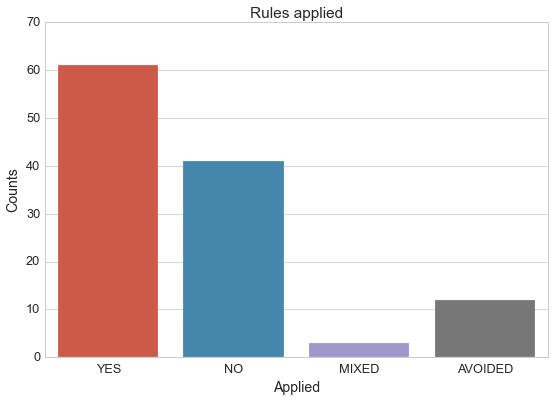

In [48]:
sns_style(w=9)

g = sns.countplot(x="applied", data=style)
g.set_xlabel("Applied")
g.set_ylabel("Counts")
g.set_title("Rules applied")

#plt.savefig("/".join([img_folder, "time/time_2.pdf"]), format="pdf")

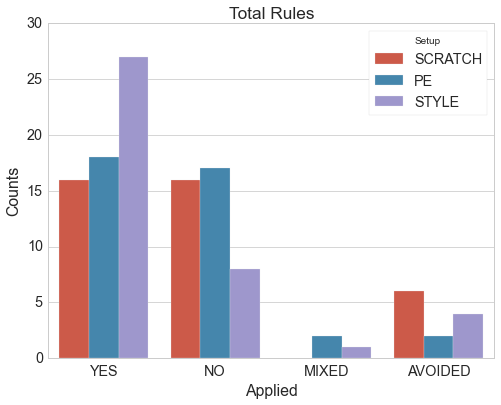

In [49]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
plt.figure(figsize=(8, 6))

#fig, axs = plt.subplots(1,2)
#fig.set_size_inches(14,6)

g = sns.countplot(x="applied", hue="setup", data=style)#, ax=axs[0])
g.set_xlabel("Applied")
g.set_ylabel("Counts")
g.set_ylim(0, 30)
g.set_title("Total Rules")
plt.legend(title="Setup", frameon=True)

plt.savefig("/".join([img_folder, "rules/rules_1a.pdf"]), format="pdf")

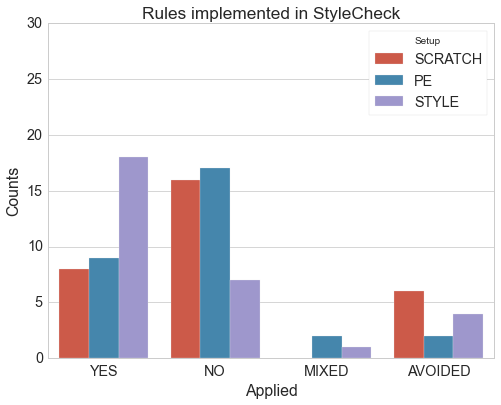

In [50]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
plt.figure(figsize=(8, 6))

d = sns.countplot(x="applied", hue="setup", data=style[style.in_stylecheck == "yes"])#, ax=axs[1])
d.set_xlabel("Applied")
d.set_ylabel("Counts")
d.set_ylim(0, 30)
d.set_title("Rules implemented in StyleCheck")
plt.legend(title="Setup", frameon=True)

plt.savefig("/".join([img_folder, "rules/rules_1b.pdf"]), format="pdf")

Here, we check the effectiveness of StyleCheck. We only focus on rules that appear in StyleCheck. We can see that the STYLE setup led to more style rules being applied versus the PE and SCRATCH setups.

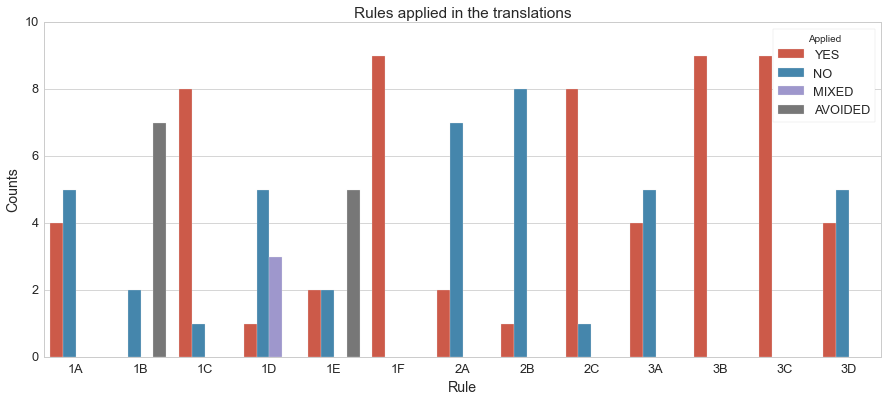

In [52]:
sns_style(w=15)

g = sns.countplot(x="rule", hue="applied", data=style)
g.set_xlabel("Rule")
g.set_ylabel("Counts")
g.set_ylim(0,10)
g.set_title("Rules applied in the translations")
plt.legend(title="Applied", frameon=True)

plt.savefig("/".join([img_folder, "rules/rules_2.pdf"]), format="pdf")

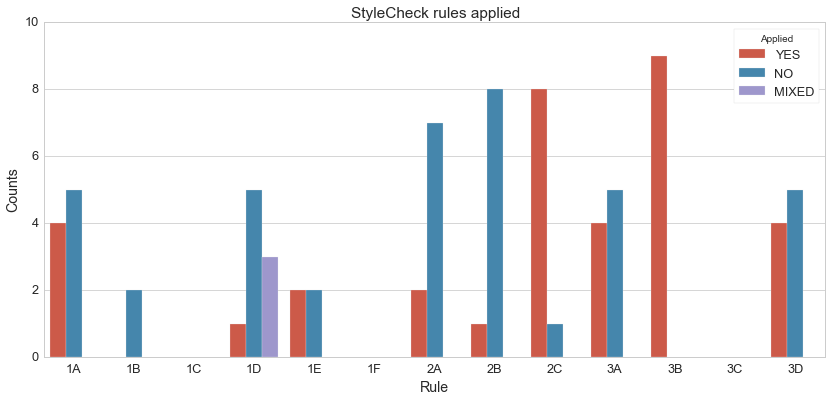

In [10]:
sns_style(w=14)

g = sns.countplot(x="rule", hue="applied", data=style[style.in_stylecheck == "yes"])
g.set_xlabel("Rule")
g.set_ylabel("Counts")
g.set_ylim(0,10)
g.set_title("StyleCheck rules applied")

plt.legend(title="Applied", frameon=True)

#plt.savefig("/".join([img_folder, "time/time_2.pdf"]), format="pdf")

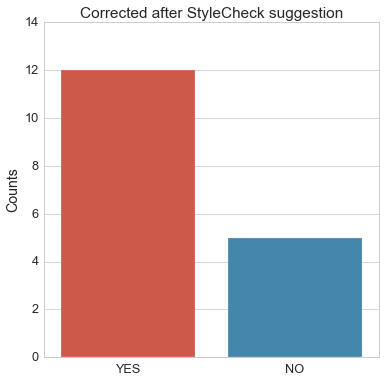

In [56]:
sns_style(w=6)

g = sns.countplot(x=corrected, data=style[style[suggested] == "yes"])
g.set_xlabel("")
g.set_ylabel("Counts")
g.set_ylim(0,14)
g.set_title("Corrected after StyleCheck suggestion")

#plt.savefig("/".join([img_folder, "rules/rules_3.png"]), dpi=600)#, format="pdf")

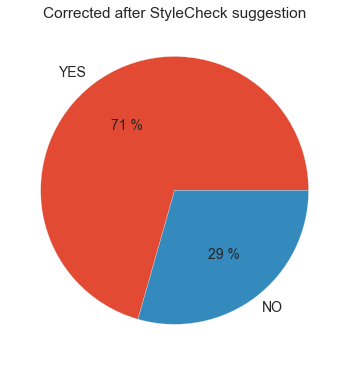

In [57]:
sns_style(w=6)

t = style[corrected].value_counts()
t = t.plot(kind="pie", figsize=(6,6), autopct='%.f %%', fontsize=14)
t.set_xlabel("")
t.set_ylabel("")
t.set_title("Corrected after StyleCheck suggestion")

#plt.savefig("/".join([img_folder, "rules/rules_3.png"]), dpi=600)#, format="pdf")

In [61]:
style["suggestion_rejected_position"].value_counts()

3    2
1    2
2    1
dtype: int64

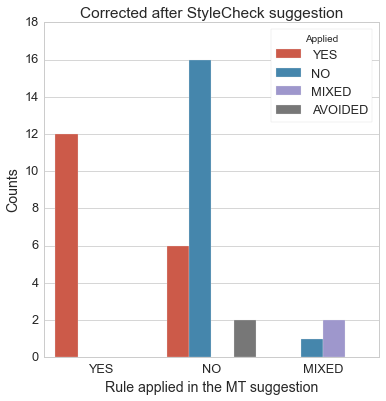

In [69]:
sns_style(w=6)

g = sns.countplot(x="pe_applied", hue="applied", data=style[style.setup == "PE"])
g.set_xlabel("Rule applied in the MT suggestion")
g.set_ylabel("Counts")
g.set_ylim(0,18)
g.set_title("Corrected after StyleCheck suggestion")

plt.legend(title="Applied", frameon=True)

#plt.savefig("/".join([img_folder, "rules/rules_4.png"]), dpi=600)#, format="pdf")

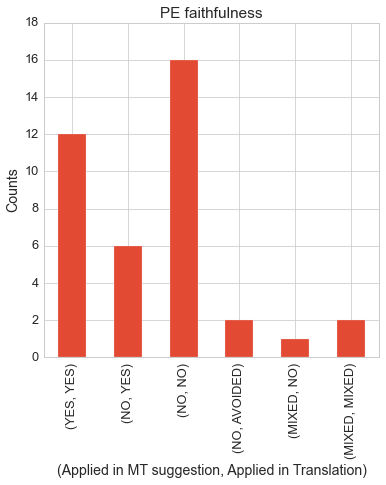

In [70]:
sns_style(w=6)

g = style[style.setup == "PE"].groupby(["pe_applied", "applied"]).size().plot(kind="bar")
g.set_xlabel("(Applied in MT suggestion, Applied in Translation)")
g.set_ylabel("Counts")
g.set_ylim(0,18)
g.set_title("PE faithfulness")

#plt.savefig("/".join([img_folder, "rules/rules_3.png"]), dpi=600)#, format="pdf")

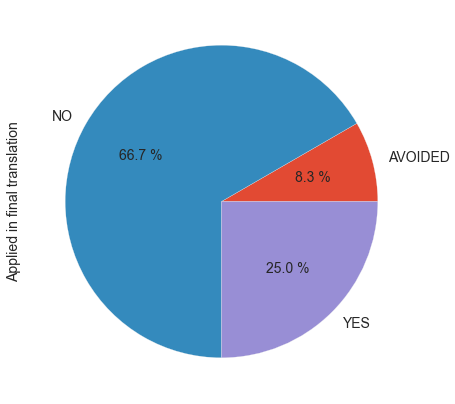

In [118]:
tt = pd.read_csv('style.csv', sep=";", decimal=",", index_col="id")
t = tt[(tt.setup == "pe") & (tt.pe_applied == "no")].groupby(["applied"]).size()
t = t.plot(kind="pie", figsize=(7,7), autopct='%.1f %%', labels=["AVOIDED", "NO", "YES"], fontsize=14)
#sns.countplot(x="applied", data=t)
#t["applied"].value_counts().plot(kind="pie", figsize=(7,7), labels=["NO", "YES", "", ""], autopct='%.1f %%', fontsize=14)
t.set_ylabel("Applied in final translation")
t.set_xlabel("")
#t.set_title("Rules not applied in MT")

plt.savefig("/".join([img_folder, "rules/rules_3b.pdf"]), format="pdf")

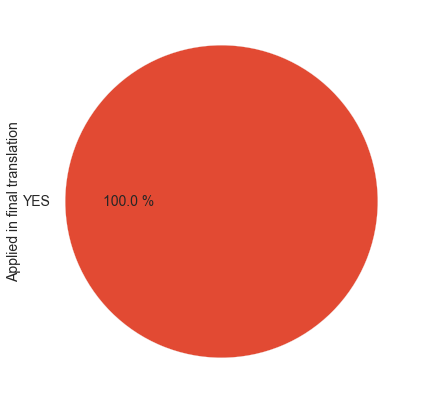

In [119]:
t = tt[(tt.setup == "pe") & (tt.pe_applied == "yes")].groupby(["applied"]).size()
t = t.plot(kind="pie", figsize=(7,7), labels=["YES"], autopct='%.1f %%', fontsize=14)
t.set_xlabel("")
t.set_ylabel("Applied in final translation")
#t.set_title("Rules applied in MT")

plt.savefig("/".join([img_folder, "rules/rules_3a.pdf"]), format="pdf")

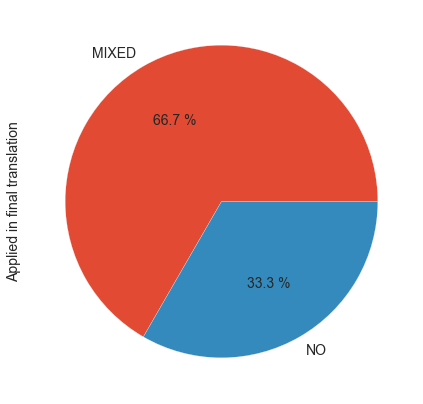

In [120]:
t = tt[(tt.setup == "pe") & (tt.pe_applied == "mixed")].groupby(["applied"]).size()
t = t.plot(kind="pie", figsize=(7,7), labels=["MIXED", "NO"], autopct='%.1f %%', fontsize=14)
t.set_xlabel("")
t.set_ylabel("Applied in final translation")
#t.set_title("Rules applied mixed in MT")

plt.savefig("/".join([img_folder, "rules/rules_3c.pdf"]), format="pdf")

In [121]:
tt[(tt.setup == "pe") & (tt.pe_applied == "mixed")].groupby(["applied"]).size()

applied
mixed    2
no       1
dtype: int64

### Did the participants check the style guide?

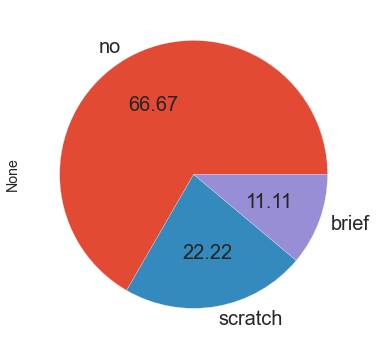

In [19]:
pie("checked_style_guide")

In [20]:
g = style[style.checked_style_guide != "no"]
g = g.reset_index("id")
g[["id", "checked_style_guide"]].groupby("id").sum()

,checked_style_guide
id,
429,scratchscratchscratchscratchscratchscratchscra...
430,scratchscratchscratchscratchscratchscratchscra...
432,briefbriefbriefbriefbriefbriefbriefbriefbriefb...
